## Febbraio 2019
### Esercizio 0
Conosco P(A),P(B),P(A|B)

1) $$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

$X\sim (0,1)$, $P(X=1)= p$

2.1) $$E(X) = p$, $\sigma = \sqrt{p(1-p)}$$

2.2)$$ 0.3 = \sqrt{p -p^2} $$

$$ 0.09 = p -p^2 $$

$$ +p^2 -p + \frac{9}{100}  = 0 $$

$$ (p-\frac{9}{10})(p-\frac{1}{10}) = 0 => p = 0.9 || p = 0.1 $$

2.3) $$ F^{-1}(std(X)) = \frac{-2p +1}{2\sqrt{p - p^2}} $$ 

$$ -2p +1 = 0 $$ 

$$ p = 0.5 $$ 

2.4) p = 0.45  

### Esercizio 1
$\overline{X}$

1.1) $\forall X_i = 0$ avrò $$\sum \frac{X_i}{n} = 0$$

1.2) $\forall X_{1,2} = 1$ avrò $$\sum \frac{X_i}{n} = \frac{2}{n}$$

1.3)$\forall X_i = 1$ avrò $$\sum \frac{X_i}{n} = 1$$

2) $$ \{0, \frac{1}{n}, \frac{2}{n}, .... , 1\} $$

3) è uno stimatore non distorto di p perchè la media campionaria è sempre iuno stimatore non distorto del valore atteso
$$E(\overline{X}) = E(\sum \frac{X_i}{n}) = \frac{1}{n} \sum E(X) = \frac{1}{n}nE(X) = E(X) = p$$

4) $n >> 1$ dimostrare che $P(|\overline(X) -p| \leq \epsilon) \geq 2\Phi(2\epsilon \sqrt{n})-1$

Standardizzo $ P(|Z| \leq \frac{\epsilon \sqrt{n}}{\sigma}) \approx 2\Phi(\frac{\sqrt{n}\epsilon}{\sigma}) -1$

Poichè $Var(X) \leq \frac{1}{4}$ allora la deviazione standard sarà max $\frac{1}{2}$ quindi avrò
$$2\Phi(2\sqrt{n}\epsilon)-1$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as st

In [2]:
car = pd.read_csv("carsharing.csv",delimiter=";",decimal=",")
car[:5]

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
2,105,FRAME D,1,-1,0.4,4.1
3,110,FRAME D,1,1,2.8,5.0
4,110,FRAME B,1,-1,2.7,5.6


### Esercizio 2

In [3]:
#2.1
print("Scalare: {}".format(car['Distance'].unique()))

Scalare: [ 3.   5.3  0.4  2.8  2.7 11.8  9.3  7.   4.  13.1  0.8  3.5 13.4  0.1
  1.   1.2 18.5  0.9  6.8  1.9 10.3 17.6  1.6  2.2  2.3 14.   0.2  0.3
  1.8 12.   6.3 18.  17.4 10.9 15.8  2.1 11.4  0.5 17.1  7.3 19.6 12.2
 13.5 21.  23.   7.1 12.1  1.5 16.6  1.7 16.5  0.6 15.1 14.8 15.7 13.
 14.6  4.7  4.2 17.2 16.7  3.1 19.   8.2  1.3 14.9  7.8  5.2 14.4  3.4
  7.4 12.4 13.3 20.   0.7  5.7  3.8 11.3  2.6  4.4 14.7 18.4 18.2  6.1
  6.6 19.7  3.7 10.6  3.2 13.9 11.6  5.6 15.6 16.3  3.3  7.2 16.1  7.6
  2.  19.1 17.8 16.  17.   4.9  8.8  9.7 19.4 15.4  9.4  8.4  1.1 18.8
 19.9  7.9  8.1 13.7 11.7  5.8 17.7 12.6 10.  15.9  8.   8.9 14.3 10.1
 17.5 14.1  8.7 18.3  6.2 19.3  9.1 10.4  9.8 12.5  6.4 16.2  3.6  5.4
 12.8  5.1  1.4 22.   8.5  9.  12.9 24.  10.8  3.9  9.6  8.6 15.2  5.
 16.8  4.1  5.9  2.5  7.5 13.2 10.2 15.5 11.9 18.7  7.7 14.5 18.6]


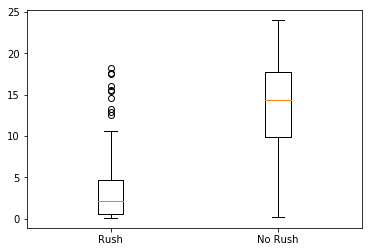

In [19]:
#2.2
carP = car[car['RushHour'] == 1]['Distance']
carNP = car[car['RushHour'] == 0]['Distance']
plt.boxplot([carP,carNP], labels=['Rush','No Rush'])
plt.show()

### 2.3
Negli orari di punta sono privilegiati gli spostamenti brevi come si può notare dal 3° quartile < 5km, al contrario per gli orari non di punta dove il 75% degli spostamenti supera i 10km

In [6]:
#4
print(carNP.mean())
print(carP.mean())
print("Possiamo dire che la distanza è maggiore nelle ore non di punta e che quindi abbiamo una fascia breve di ore di punta, una grande di ore non di punta")

13.487428571428563
3.3193548387096796
Possiamo dire che la distanza è maggiore nelle ore non di punta e che quindi abbiamo una fascia breve di ore di punta, una grande di ore non di punta


### Esercizio 3

In [20]:
#3.1
tragittibrevi = car[car['Distance'] < 1.5]

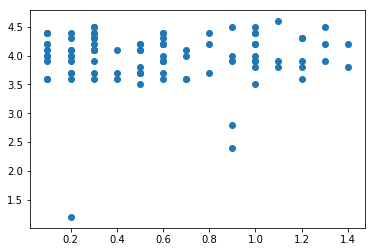

In [21]:
#3.2
plt.scatter(tragittibrevi['Distance'], tragittibrevi['Time'])
plt.show()

In [22]:
#3.3
print('Sia dal gragico che dal valore del coefficiente di correlazione {}, possiamo confermare che non vi è alcuna relazione tra i due valori presi in considerazione'.format(tragittibrevi['Distance'].corr(tragittibrevi['Time'])))

Sia dal gragico che dal valore del coefficiente di correlazione 0.03691131525657363, possiamo confermare che non vi è alcuna relazione tra i due valori presi in considerazione


### Esercizio 4

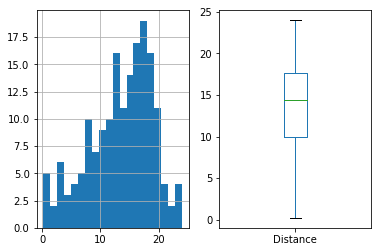

In [23]:
#4.1
plt.subplot(1,2,1)
carNP.hist(bins=20)
plt.subplot(1,2,2)
carNP.plot.box()
plt.show()

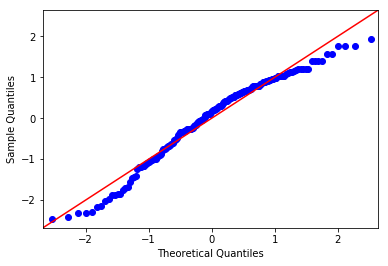

13.487428571428563 14.4
Il grafico quasi sovrapposto alla bisettrice e la vicinanza tra media e mediana fanno intuire un comportamento normale


In [26]:
# 4.2
sm.qqplot(carNP, fit=True, line='45')
plt.show()
print(carNP.mean(), carNP.median())
print("Il grafico quasi sovrapposto alla bisettrice e la vicinanza tra media e mediana fanno intuire un comportamento normale")

In [11]:
print('Media : {}\nMediana : {}\nSia dal grafico che dal valore della Media e Mediana possiamo dire che la Distanza negli orari non di punta segue un andamento approssimativamente normale con coda a sinistra'.format(carNP.mean(),carNP.quantile(0.5)))

Media : 13.487428571428563
Mediana : 14.4
Sia dal grafico che dal valore della Media e Mediana possiamo dire che la Distanza negli orari non di punta segue un andamento approssimativamente normale con coda a sinistra


### Esercizio 5

In [27]:
#5.1
len(car[car['RushHour'] == 1])/len(car)
car['RushHour'].mean()

0.5535714285714286

In [13]:
#5.2
print("Media campionaria")

Media


In [28]:
#5.3
campione = len(car.dropna())
campione

392

### 5.4
$$ P(|\bar{X_n} - \mu| <= 0.025) $$

$$ P(-0.025 <= \bar{X_n} - \mu <= 0.025) $$

$$ P(-\frac{0.025}{\frac{\sigma}{\sqrt{n}}} <=  \frac{\bar{X_n} - \mu}{\frac{\sigma}{\sqrt{n}}}<= \frac{0.025}{\frac{\sigma}{\sqrt{n}}}) $$

$$ P(-\frac{0.025}{\frac{\sigma}{\sqrt{n}}} <=Z<= \frac{0.025}{\frac{\sigma}{\sqrt{n}}}) $$

$$ P(Z <= \frac{0.025}{\frac{\sigma}{\sqrt{n}}}) - P( Z<= -\frac{0.025}{\frac{\sigma}{\sqrt{n}}}) $$

$$ P(|\bar{X_n} - \mu| <= 0.025) = \phi(\frac{0.025}{\frac{\sigma}{\sqrt{n}}}) - \phi(-\frac{0.025}{\frac{\sigma}{\sqrt{n}}}) $$

In [29]:
p=0.05
Z = st.norm()
dev=car['RushHour'].std()
n = len(car.dropna())
x1 = (0.025*(n)**0.5)/dev
Z.cdf(x1)-Z.cdf(-x1)

0.6799767876150911

### Esercizio 6
incidente = A = 0.15 \
orario di punta = B = 0.55

P(A|B) = 0.2

$$ P(B|A) = \frac{P(B \cap A)}{P(A)} $$

$$ P(B|A) = \frac{P(A|B)P(B)}{P(A)} $$

In [16]:
p = 0.15
pp = 0.2
prob = (pp*(len(car[car['RushHour'] == 1])/len(car)))/p

In [17]:
print('La probabilità che una data auto oggi non è disponibile perché ieri ha subito un incidente è : {}'.format(prob))

La probabilità che una data auto oggi non è disponibile perché ieri ha subito un incidente è : 0.7380952380952381
